17.25 Yield curve envelop

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
T = 120; t = range(1, T + 1); 
y_true = 0.0006 * np.array(np.log(3.0 + 1.0 * np.array(t))) + 0.0007;
p_true = np.hstack([1, np.power((y_true + 1), -1 * np.array(t))]);
F = 1000  # face value
K = 9     # 9 different bonds 
T = 120   # 120 months (10 years)
r = 0.05; # interest rate (could change depending on maturity)
# constructing coupons 
C = np.zeros((K, T)); # matrix of bond coupons (rows = bonds, columns = coupon payments)
C[0, 23] = F             # bond 1: zero coupon, 2 year maturity 
C[1, 59] = F             # bond 2: zero coupon, 5 year maturity 
C[2, 119] = F            # bond 3: zero coupon, 10 year maturity
C[3, range(5, 29, 6)] = r * F / 2; C[3, 23] += F   # bond 4: semi-annual cpn, 2 yr maturity
C[4, range(5, 65, 6)] = r * F / 2; C[4, 59] += F   # bond 5: semi-annual cpn, 5 yr maturity 
C[5, range(5, 125, 6)] = r * F/ 2; C[5, 119] += F  # bond 6: semi-annual cpn, 10 yr maturity
C[6, range(2, 26, 3)] = r * F/ 4; C[6, 23] += F    # bond 7: quarterly cpn, 2 yr maturity
C[7, range(2, 62, 3)] = r * F/ 4; C[7, 59] += F    # bond 8: quarterly cpn, 5 yr maturity
C[8, range(2, 122, 3)] = r * F/ 4; C[8, 119] += F; # bond 9: quarterly cpn, 10 yr maturity
C = np.hstack([np.zeros((K, 1)), C]); # adding t = 0
# 'true' prices
b = np.matmul(C, p_true)

In [7]:
d_max, d_min = [1], [1]
for t in range(1, T+1):
    p = cp.Variable(T+1, nonneg=True)
    objective = cp.Minimize(p[t])
    constraints = [
        p[0] == 1,
        p[:-1] - p[1:] >= 0,
        C @ p == b
    ]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    d_min.append(p.value[t])
    p = cp.Variable(T+1, nonneg=True)
    objective = cp.Maximize(p[t])
    constraints = [
        p[0] == 1,
        p[:-1] - p[1:] >= 0,
        C @ p == b
    ]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    d_max.append(p.value[t])
y_max = np.power(np.array(d_min)[1:], - 1 / np.arange(1, T+1)) - 1
y_min = np.power(np.array(d_max)[1:], - 1 / np.arange(1, T+1)) - 1

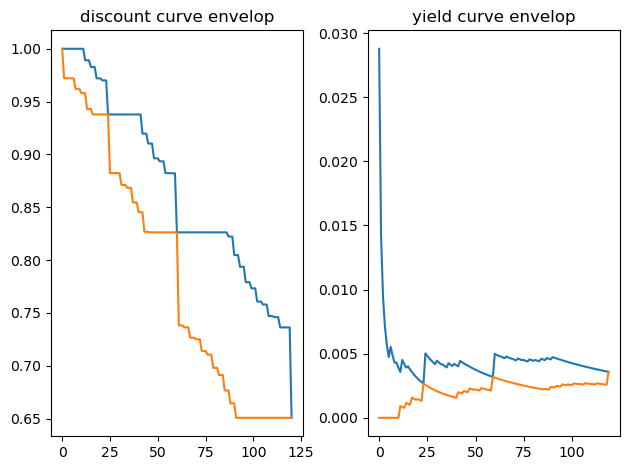

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].plot(d_max)  
axs[0].plot(d_min)

axs[1].plot(y_max)  
axs[1].plot(y_min)

axs[0].set_title('discount curve envelop')
axs[1].set_title('yield curve envelop')


plt.tight_layout()
plt.show()

In [14]:
np.where(np.array(d_max) - np.array(d_min) < 1e-3) # time points where value of the discount rate is certain

(array([  0,  24,  60, 120]),)